In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler



In [4]:
data=pd.read_csv("/content/data.csv")

In [5]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667.0,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10.0,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533.0,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7.0,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062.0,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,3.0,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000.0,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,5.0,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693.0,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,3.0,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


# Preprocessing

In [6]:
# Check for missing values
print(data.isnull().sum())


valence             0
year                0
acousticness        0
artists             0
danceability        1
duration_ms         1
energy              1
explicit            1
id                  1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
name                1
popularity          1
release_date        1
speechiness         1
tempo               1
dtype: int64


In [7]:
# Drop rows with any missing values
data = data.dropna()

# Also update your selected features again
features = ['valence', 'danceability', 'energy', 'acousticness', 'tempo']
data_features = data[features]

# Check again
print(data_features.isnull().sum())


valence         0
danceability    0
energy          0
acousticness    0
tempo           0
dtype: int64


In [8]:
# Remove duplicate songs based on features
data_features = print(data_features.drop_duplicates())


       valence  danceability  energy  acousticness    tempo
0       0.0594         0.279  0.2110      0.982000   80.954
1       0.9630         0.819  0.3410      0.732000   60.936
2       0.0394         0.328  0.1660      0.961000  110.339
3       0.1650         0.275  0.3090      0.967000  100.109
4       0.2530         0.418  0.1930      0.957000  101.665
...        ...           ...     ...           ...      ...
18319   0.3290         0.559  0.7770      0.310000   87.016
18320   0.2040         0.633  0.0519      0.562000   76.034
18321   0.5390         0.662  0.8050      0.002990  133.931
18322   0.1100         0.572  0.8100      0.015700  126.052
18323   0.2110         0.576  0.9060      0.000332  127.935

[18046 rows x 5 columns]


In [9]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")






Number of duplicate rows: 0


# Feature Scaling / Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features you want to scale
features_to_scale = ['valence', 'danceability', 'energy', 'acousticness', 'tempo']

# Create a scaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data[features_to_scale])

# Create a new DataFrame with scaled features
import pandas as pd
scaled_df = pd.DataFrame(data_scaled, columns=features_to_scale)

# Show the first 5 rows of scaled data
print(scaled_df.head())


    valence  danceability    energy  acousticness     tempo
0 -1.973307     -1.650725 -0.949595      1.171797 -1.164170
1  1.590101      1.575946 -0.456237      0.513844 -1.817055
2 -2.052178     -1.357934 -1.120372      1.116529 -0.205782
3 -1.556866     -1.674626 -0.577679      1.132320 -0.539432
4 -1.209832     -0.820156 -1.017906      1.106002 -0.488683


# KMeans clustering

In [11]:
from sklearn.cluster import KMeans

# Decide how many clusters (songs groups) you want
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model
kmeans.fit(scaled_df)

# Add the cluster labels to the original dataset
data['cluster'] = kmeans.labels_

# See first few rows
print(data[['name', 'artists', 'cluster']].head())


                                                name  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
1                            Clancy Lowered the Boom   
2                                          Gati Bali   
3                                          Danny Boy   
4                        When Irish Eyes Are Smiling   

                                             artists  cluster  
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...        7  
1                                     ['Dennis Day']        3  
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...        7  
3                                   ['Frank Parker']        7  
4                                     ['Phil Regan']        7  


<ipython-input-12-d4175ebf5cb1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data, palette='viridis')


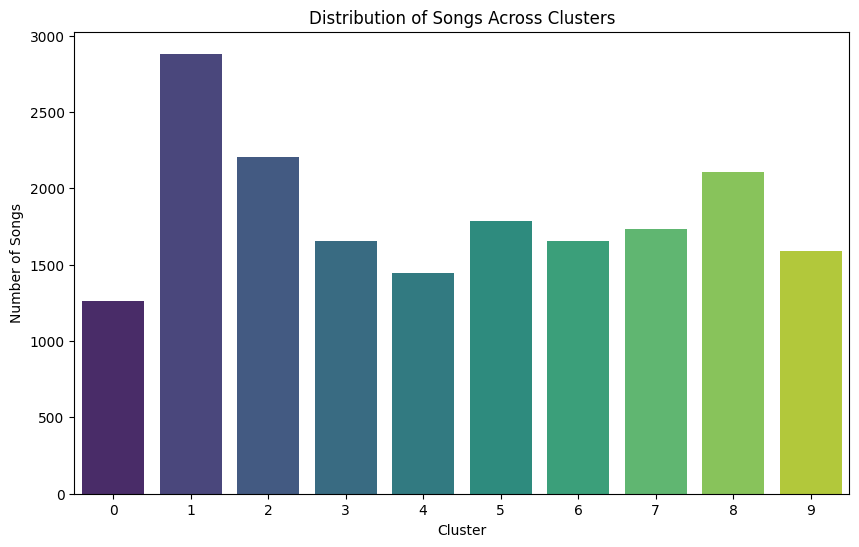

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of clusters
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', data=data, palette='viridis')
plt.title('Distribution of Songs Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.show()


# Scaling the Features

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_features = ['valence', 'danceability', 'energy', 'acousticness', 'tempo']

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_features])

# Now you can apply PCA to the scaled features


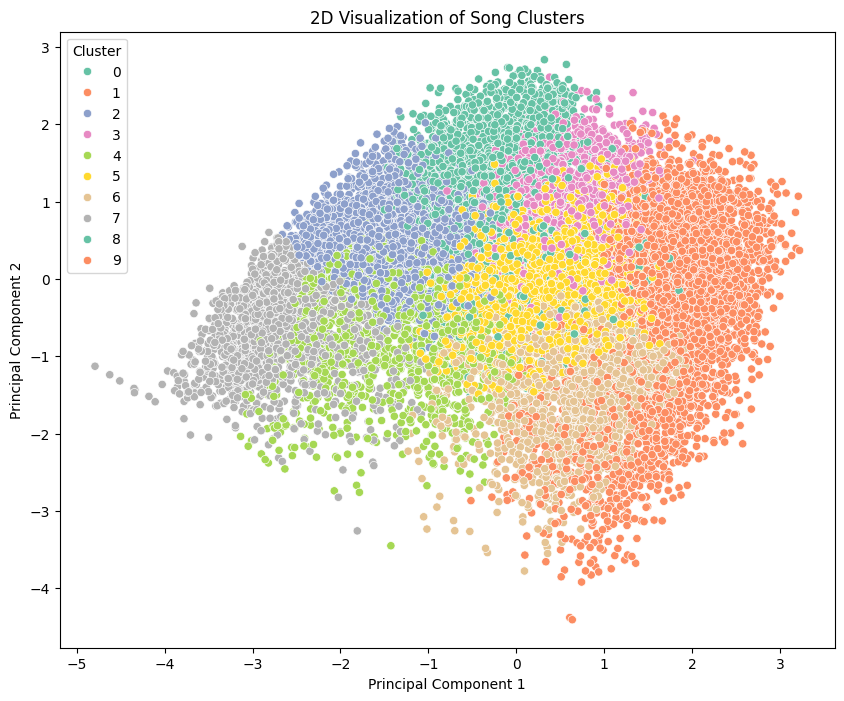

In [15]:
# Apply PCA to reduce features to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['cluster'] = data['cluster']

# Scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='Set2')
plt.title('2D Visualization of Song Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [16]:
# Get the cluster centers from KMeans
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to view the cluster centers with feature names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=scaled_df.columns)
print(cluster_centers_df)


    valence  danceability    energy  acousticness     tempo
0  0.722732     -0.184955 -0.283385      0.680369  1.713788
1  0.933042      0.983581  0.966768     -1.073756 -0.038315
2 -0.411223     -0.196474 -0.875715      0.889256 -0.857551
3  1.043704      0.496789  0.316083      0.370182 -0.215265
4 -1.094586     -0.911826 -0.811482      0.691230  0.754982
5 -0.359602      0.618702 -0.015730     -0.744617 -0.396135
6 -0.526792     -0.523450  1.177250     -1.144845 -0.282415
7 -1.509741     -1.567556 -1.123064      0.950075 -1.100047
8  0.524086      0.805746 -0.798639      0.959597 -0.057123
9  0.123443     -0.558144  1.169136     -1.115937  1.454883


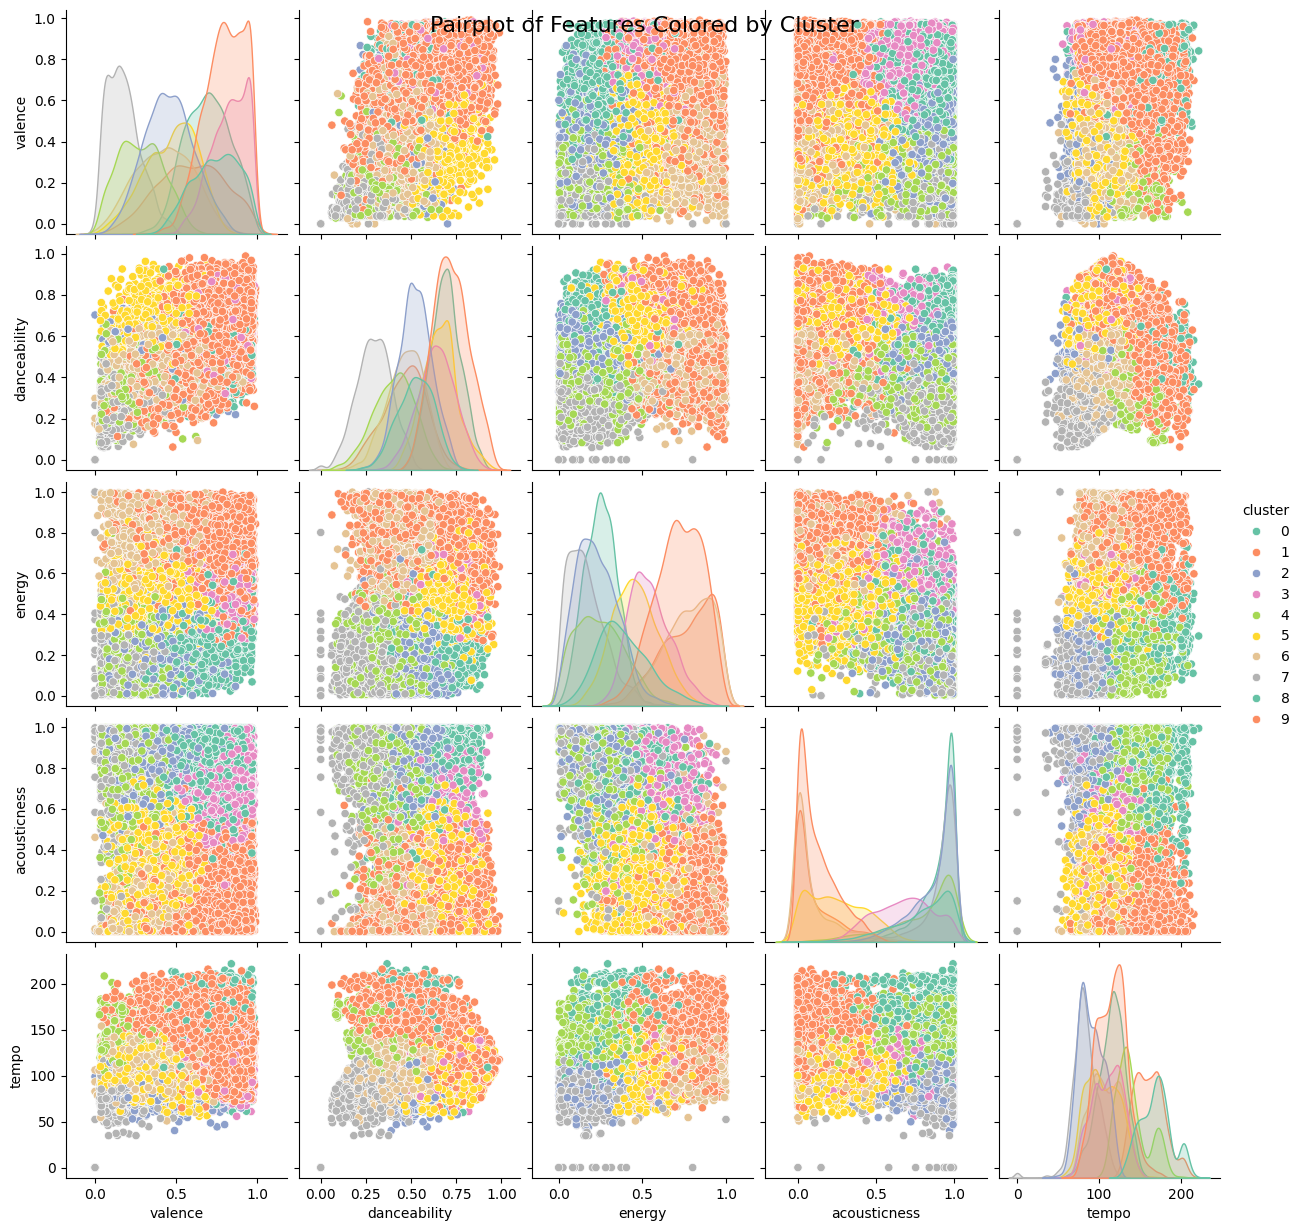

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster information to the DataFrame for plotting
data['cluster'] = kmeans.labels_

# Create a pairplot of a subset of features, colored by cluster
sns.pairplot(data[['valence', 'danceability', 'energy', 'acousticness', 'tempo', 'cluster']], hue='cluster', palette='Set2')
plt.suptitle('Pairplot of Features Colored by Cluster', fontsize=16)
plt.show()


<ipython-input-18-4ab442ad92c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=data, palette='Set2')
<ipython-input-18-4ab442ad92c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=data, palette='Set2')
<ipython-input-18-4ab442ad92c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=data, palette='Set2')
<ipython-input-18-4ab442ad92c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

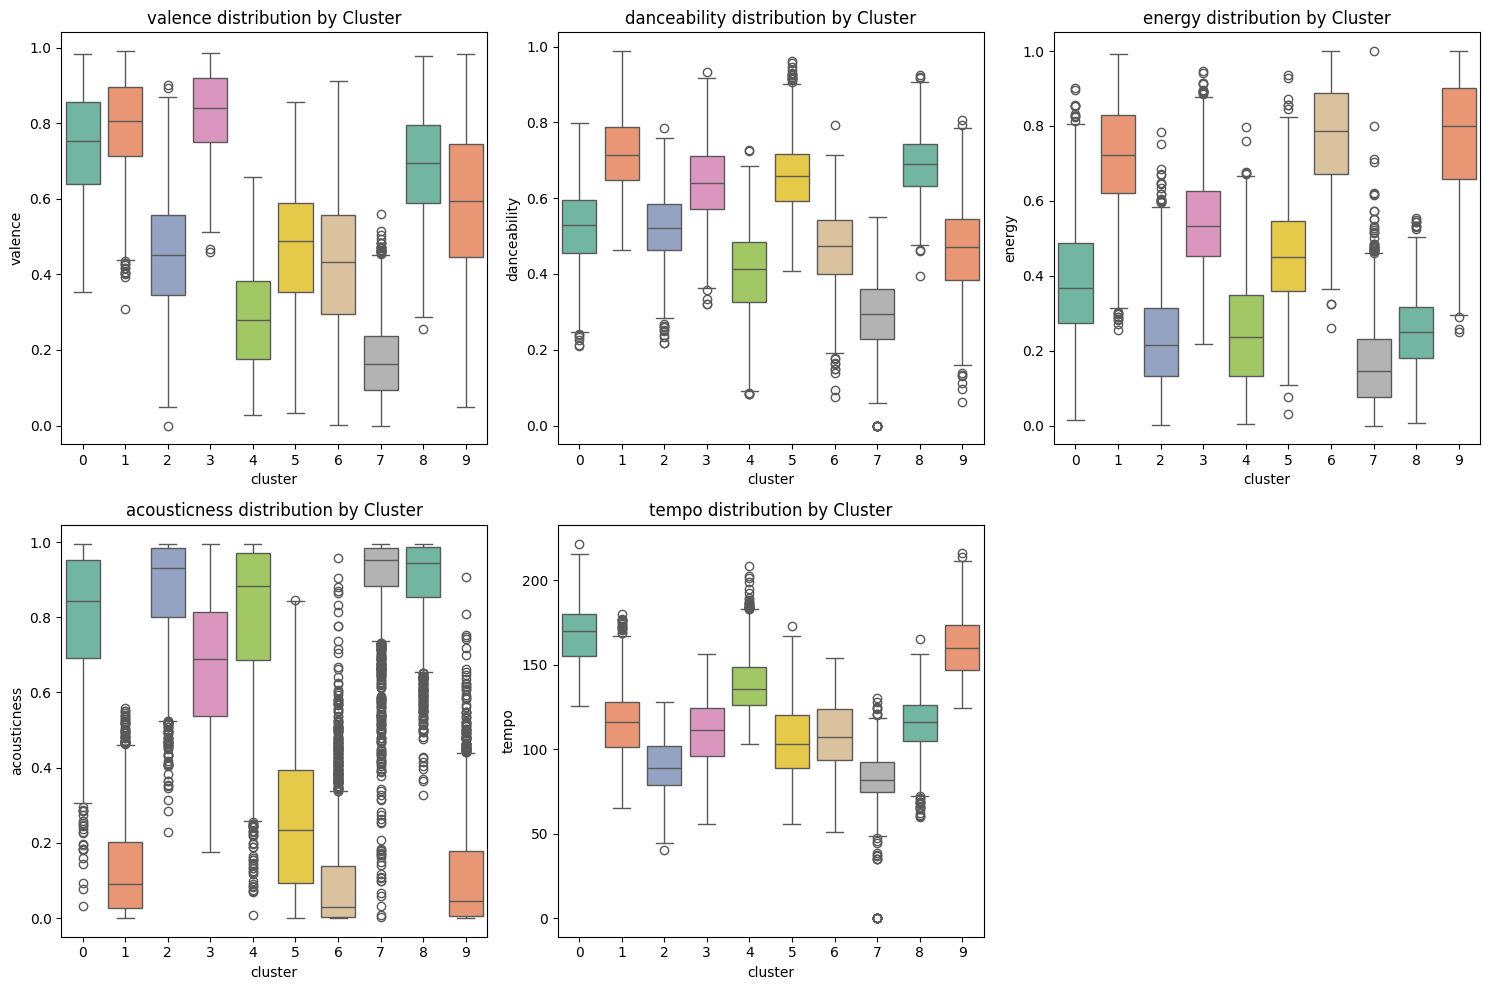

In [18]:
# Create boxplots for each feature per cluster
features = ['valence', 'danceability', 'energy', 'acousticness', 'tempo']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='cluster', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} distribution by Cluster')

plt.tight_layout()
plt.show()


In [19]:
# Get songs in the same cluster as the user (for example, cluster 3)
recommended_songs = data[data['cluster'] == 3][['name', 'artists', 'cluster']]
print("Recommended Songs based on Cluster 3:")
print(recommended_songs)


Recommended Songs based on Cluster 3:
                                 name                artists  cluster
1             Clancy Lowered the Boom         ['Dennis Day']        3
46                      Kasr-ı Gülşen    ['Mehmet Kemiksiz']        3
58               Şu Boğaz Harbi Nedir    ['Mehmet Kemiksiz']        3
108          St. Patrick's Day Parade         ['Dennis Day']        3
129    Beyaz Entarisiyle Kar Gibi Kız    ['Mehmet Kemiksiz']        3
...                               ...                    ...      ...
18185                      Sweet Life        ['Frank Ocean']        3
18264                        Trumpets       ['Jason Derulo']        3
18275                         Blondie       ['Current Joys']        3
18277                Strawberry Blond             ['Mitski']        3
18307                   House of Gold  ['Twenty One Pilots']        3

[1655 rows x 3 columns]


In [20]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# You can also check the inertia (sum of squared distances to the closest cluster center)
print(f'Inertia: {kmeans.inertia_}')


Silhouette Score: 0.20767264206204183
Inertia: 26570.47282456138
